## FaceNet single-predictor models
Set of models investigating face perception:
- single-predictor model with binary regressor coding for presence of any face (**any_faces**)
- **any_faces** + regressor coding for first appearance face for the first time (**first_time_face**)
- **any_faces** + log of time since last appearance of detected face (mean across faces if more than one are present in the frame, **log_mean_time_since**) 
- **any_faces** + log of time since last appearance of detected face (max across multiple faces, **log_max_time_since**) 
- **any_faces** + log of cumulative time the detected face has been on screen (mean across faces, **log_mean_face_time_cum**)
- **any_faces** + log of cumulative time the detected face has been on screen (max across faces, **log_max_face_time_cum**)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = [['any_faces']]
other = ['first_time_face', 'log_mean_time_since', 'log_max_time_since', 'log_mean_face_time_cum', 'log_max_face_time_cum']
for p in other:
    predictors.append(['any_faces', p])

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [6]:
#mdict = {}
#for pset in predictors:
#    mdict['+'.join(pset)] = create_set_models(pset, confounds, name='+'.join(pset), datasets={'Budapest': {'id': 27, 'tasks': ['movie']}})

In [7]:
filename = Path('models') / 'facenet.json'

In [23]:
dump_collection(mdict, filename)

In [8]:
mdict = load_collection(filename)

## Generate reports

In [9]:
for (pred, dataset, task), model in flatten_collection(mdict):
    model.generate_report(run_id=model.runs[0])

In [10]:
for pset in predictors:
    mdict['+'.join(pset)]['Budapest']['movie'].plot_report()

## Inspect regressors

In [8]:
df = _extract_regressors(mdict)

In [ ]:
plot_regressor('distribution', df=df, predictors=other,
               split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor('timeseries', df=df, predictors=other,
               split_by='row', height=1.2, aspect=10)

In [11]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'], 
             predictors=other,
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [9]:
for (pred, dataset, task), model in flatten_collection(mdict):
    if model.get_status()['status'] in 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{dataset}, {model.status}, {model.hash_id}')

Budapest, PASSED, M8vE1
HealthyBrainNetwork, PASSED, wWyvQ
LearningTemporalStructure, PASSED, 97p0Q
Raiders, PASSED, AqQD3
SchematicNarrative, PASSED, 9EdJr
Sherlock, PASSED, Ma4vb
SherlockMerlin, PASSED, wjN6m
SherlockMerlin, PASSED, A6oXQ
studyforrest, PASSED, MGvYD
Budapest, PASSED, AVjo3
HealthyBrainNetwork, PASSED, wkVlD
LearningTemporalStructure, PASSED, Mv3rR
Raiders, PASSED, MNQr0
SchematicNarrative, PASSED, M4jBy
Sherlock, PASSED, M55Dn
SherlockMerlin, PASSED, 9eyvb
SherlockMerlin, PASSED, wl80X
studyforrest, PASSED, A253P
Budapest, PASSED, AbqGy
HealthyBrainNetwork, PASSED, 9BqXp
LearningTemporalStructure, PASSED, MzQ5z
Raiders, PASSED, w0glP
SchematicNarrative, PASSED, MD1LO
Sherlock, PASSED, wK2LW
SherlockMerlin, PASSED, Aop40
SherlockMerlin, PASSED, AYyWb
studyforrest, PASSED, wQDL1
Budapest, PASSED, wOO33
HealthyBrainNetwork, PASSED, AxBd1
LearningTemporalStructure, PASSED, w0glv
Raiders, PASSED, AYyvP
SchematicNarrative, PASSED, wJ3Qe
Sherlock, PASSED, 9Bq6N
SherlockMerl

In [13]:
' '.join([m.hash_id for _, m in flatten_collection(mdict)])

'M8vE1 AVjo3 AbqGy wOO33 MXjz3 A13VD'

## Results

In [10]:
flat_models = flatten_collection(mdict)

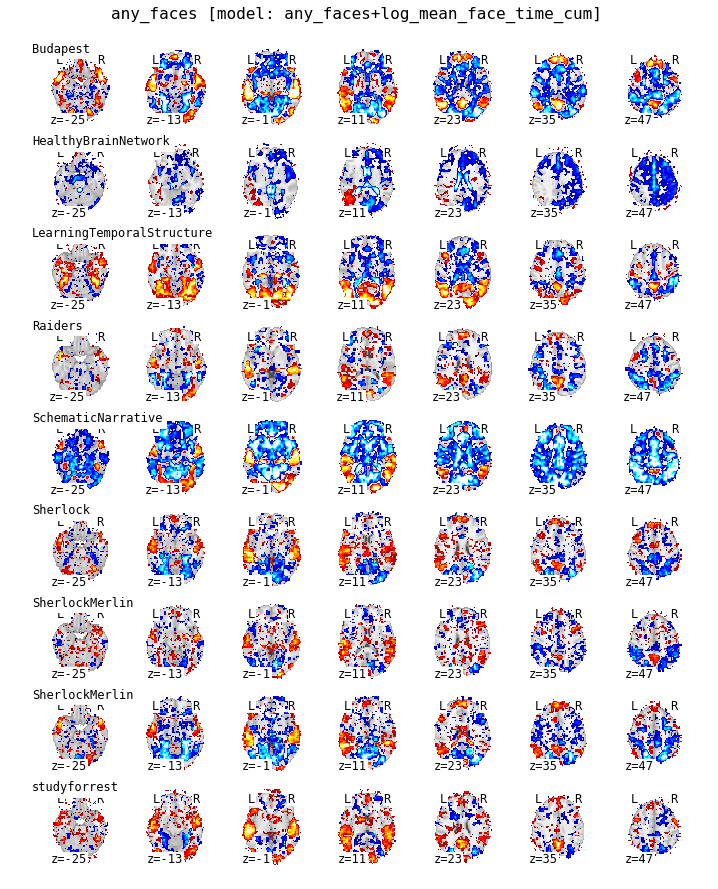

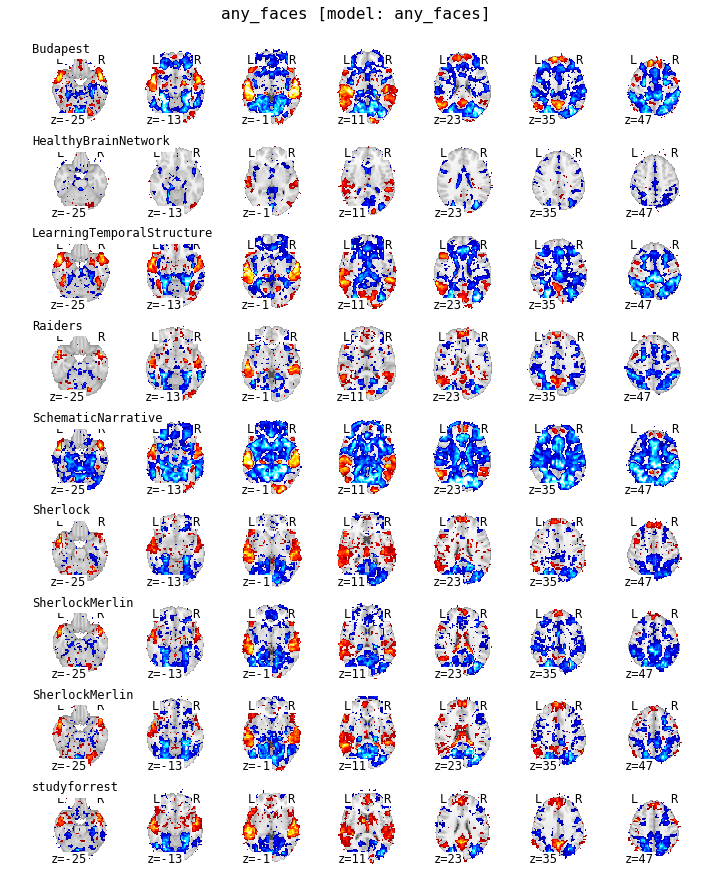

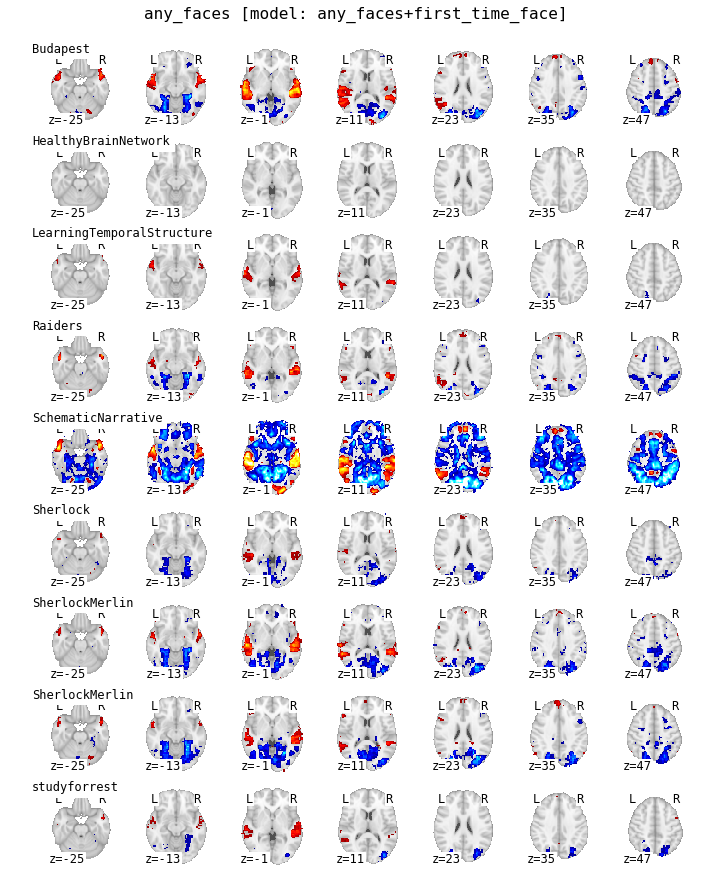

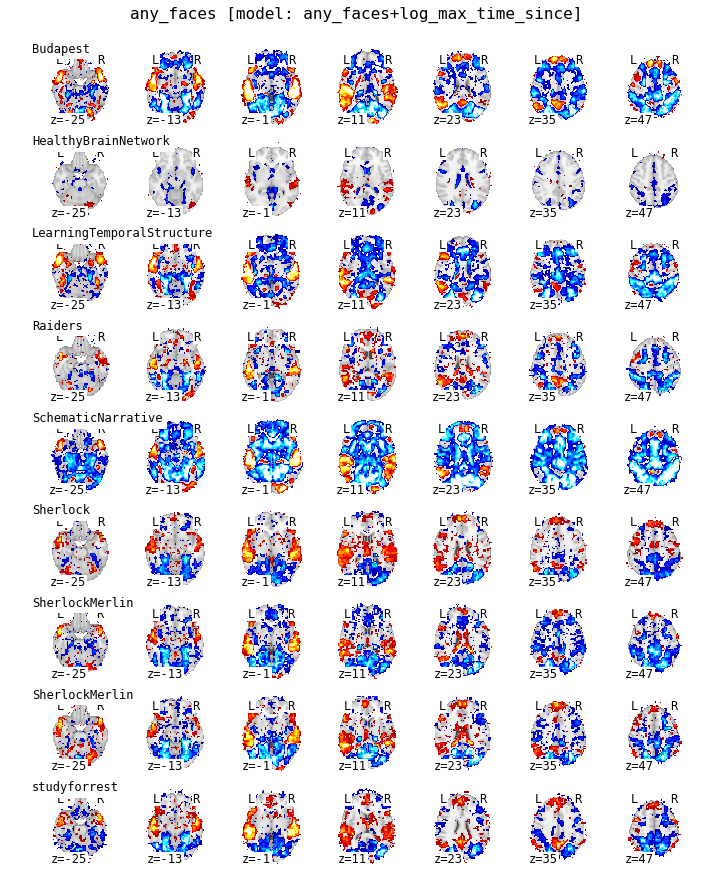

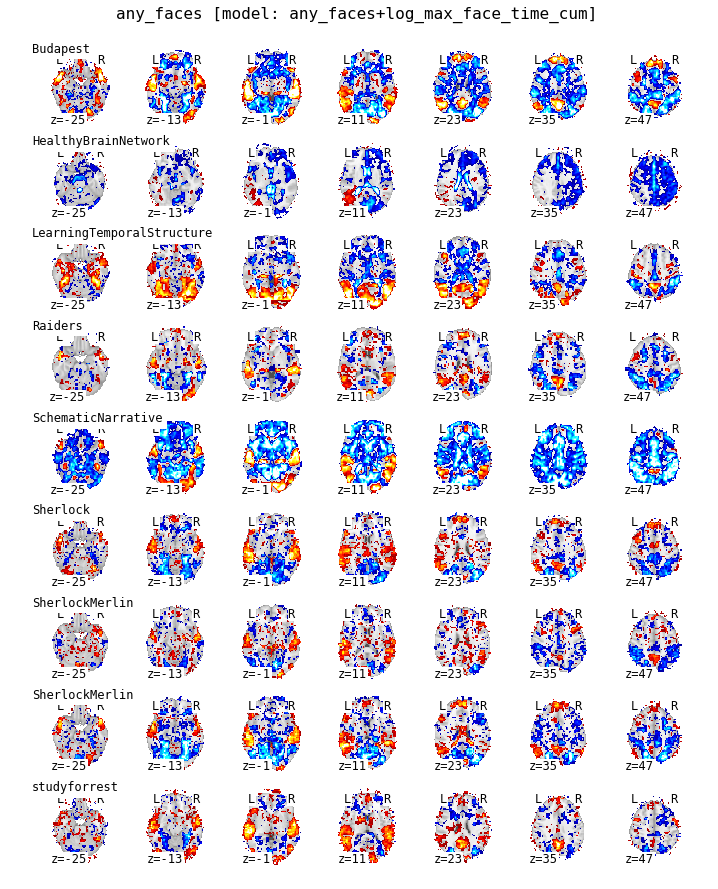

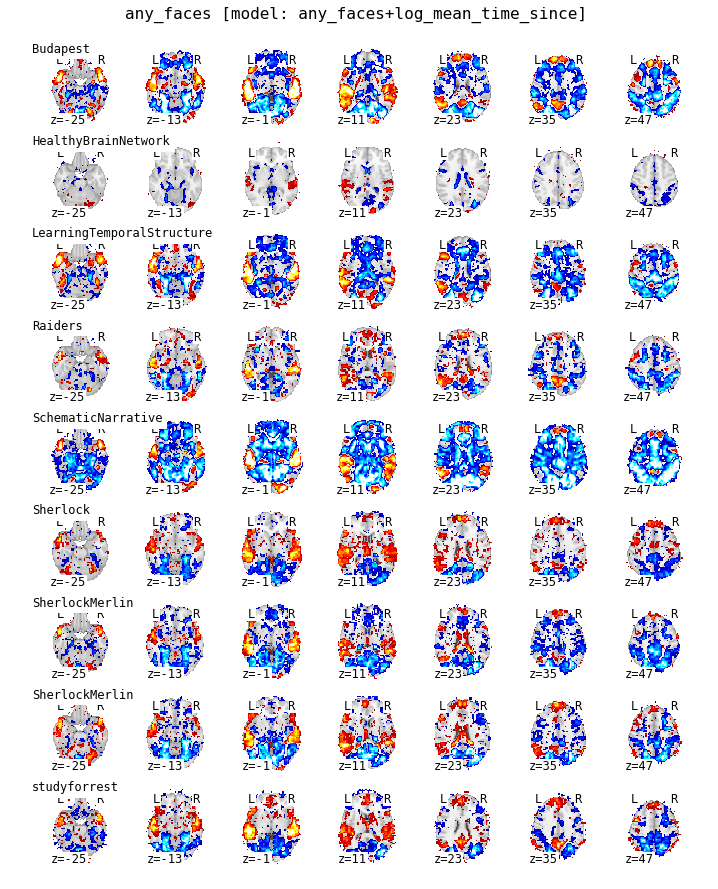

In [11]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                         contrasts=['any_faces'],
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)

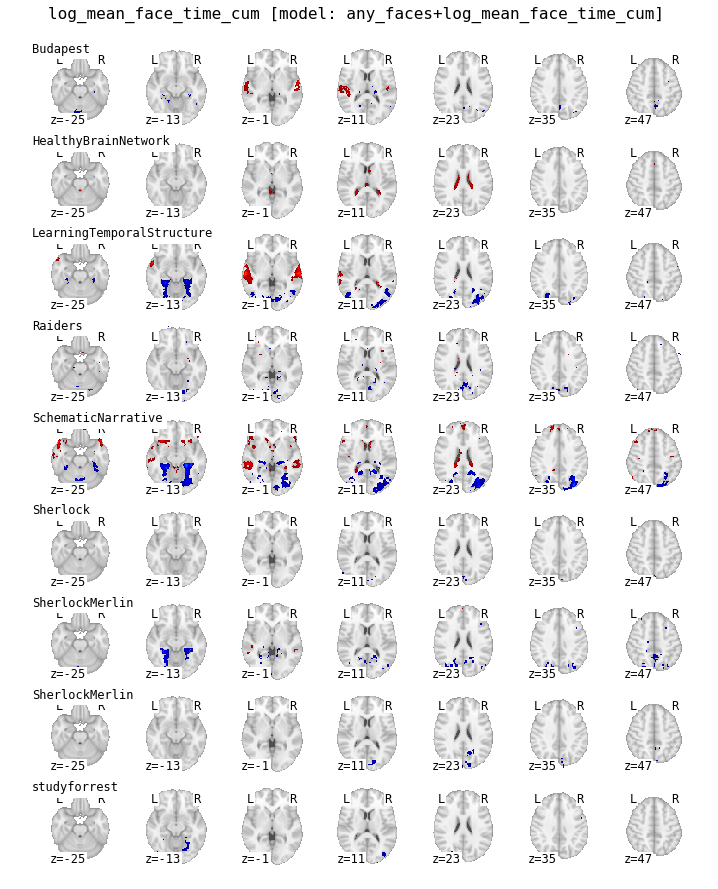

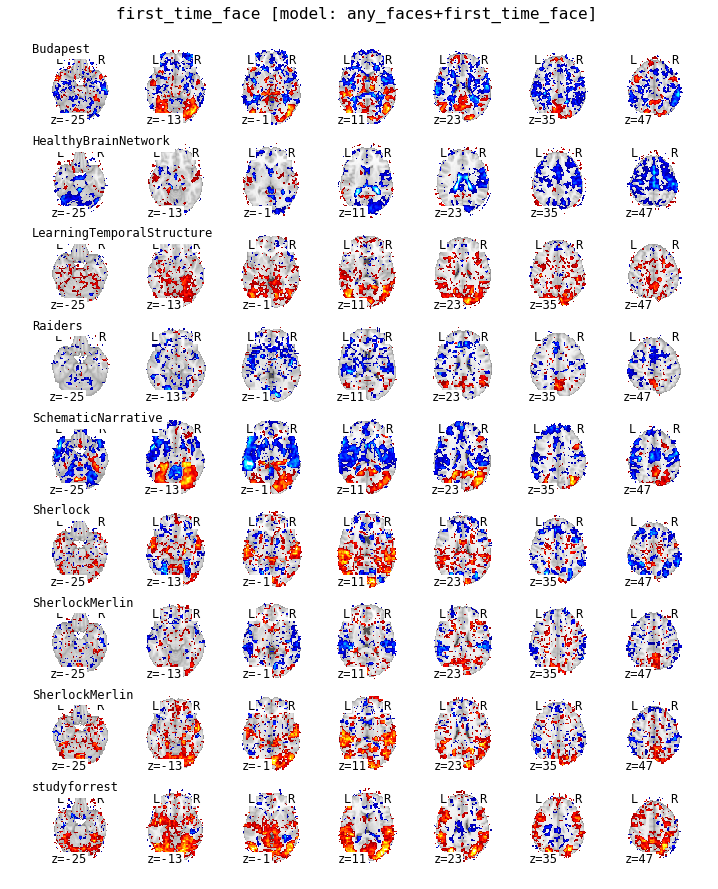

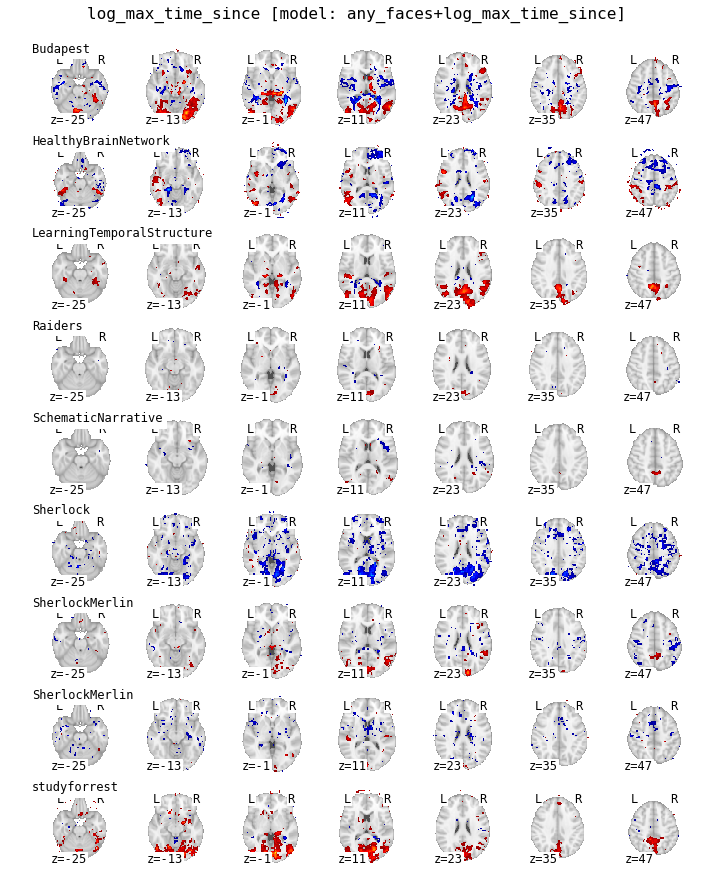

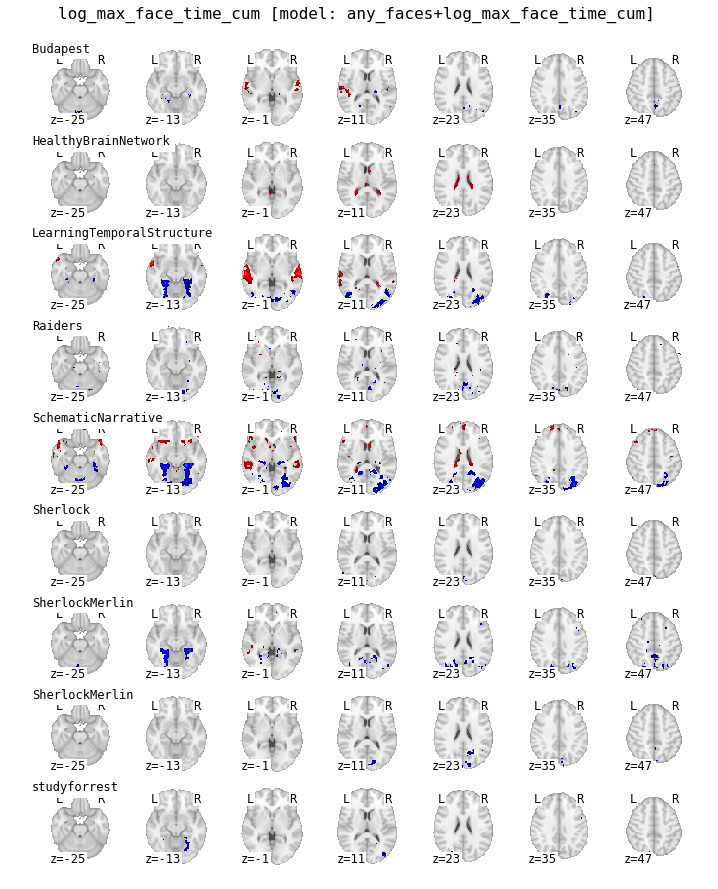

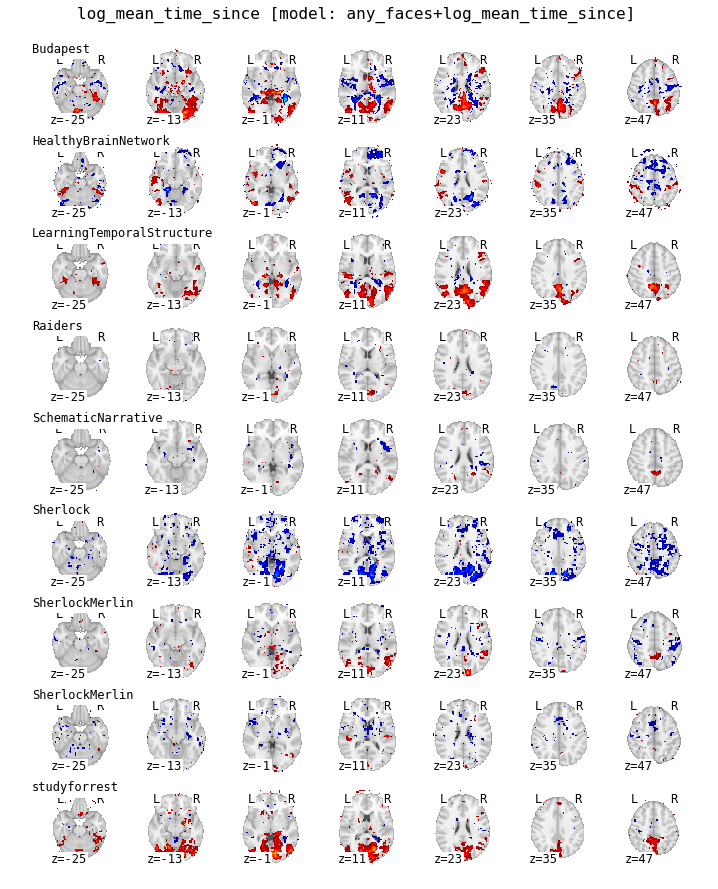

In [12]:
plot_contrast_by_analysis(flat_models,
                         contrasts=other,
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)